<a href="https://colab.research.google.com/github/gamefellow/Machine_Learning_Exercises/blob/main/Linear_regression_using_normal_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns 
from sklearn import linear_model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import pandas as pd

In [ ]:
cars_data = pd.read_csv('/content/CarPrice_Assignment.csv',index_col = 'car_ID')

In [ ]:
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
cars_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


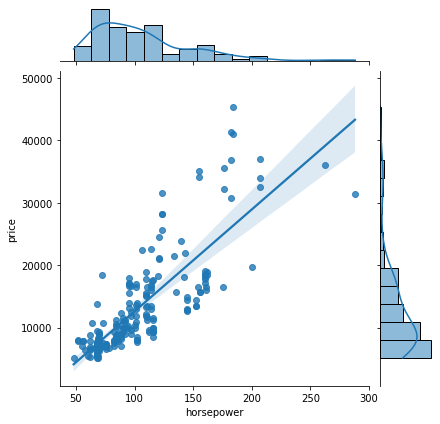

In [ ]:
sns.jointplot(x = cars_data['horsepower'],y = cars_data['price'], data = 'cars_data',kind = 'reg')

In [ ]:
categorical_columns = cars_data.select_dtypes('object').columns
label_encoder = preprocessing.LabelEncoder()


In [ ]:
for column in categorical_columns:
  temp = label_encoder.fit_transform(cars_data[column])
  cars_data[column] = temp
  cars_data[categorical_columns]
cars_data.dtypes

symboling             int64
CarName               int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [115]:
x = cars_data.drop(columns = ['price'])
y = cars_data['price']
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 32)



In [116]:
y_test

car_ID
146    11259.0
204    22470.0
122     6692.0
141     7603.0
185     7995.0
        ...   
108    11900.0
102    13499.0
174     8948.0
41     10295.0
190    11595.0
Name: price, Length: 62, dtype: float64

In [117]:

print(x_train.shape)

(143, 24)


In [106]:
y_train.squeeze()
x_test.squeeze()
y_test.squeeze()

car_ID
146    11259.0
204    22470.0
122     6692.0
141     7603.0
185     7995.0
        ...   
108    11900.0
102    13499.0
174     8948.0
41     10295.0
190    11595.0
Name: price, Length: 62, dtype: float64

In [107]:
print(y_test.shape)
x_test.shape

(62,)


(62,)

NORMAL EQUATION FOR LINEAR REGRESSION

THeta = ((X**T * X)**-1 * (X**T * Y))

In [108]:

def theta_calc(x_train,y_train):
  nr_data = x_train.shape[0]
  bias = np.ones((nr_data,1))
  x_train_bi = np.append(bias,x_train,axis = 1)
  print(x_train_bi,x_train_bi.shape)
  ## Normal equation starts here ....
  dot_product_x = np.dot(x_train_bi.T,x_train_bi)
  Inverse_dot_p = np.linalg.inv(dot_product_x)
  dot_product_with_xTrans = np.dot(Inverse_dot_p,x_train_bi.T)
  theta = np.dot(dot_product_with_xTrans,y_train)
  return theta

WE GOT NORMAL EQUATION AND NOW WE NEED TO FIND DATA POINTS OF THAT PARTICULAR VECTOR WE GOT TO SCATTER THE PLOT LETS GO.......

In [109]:
def pred_function(slope,intercept,x_test):
  pred = [ ] # list of all data points for that slope and intercept
  nr_data = x_test.shape[0]
  for i in range(nr_data):
    pred.append((slope * x_test[i]) + intercept)
  return pred

In [110]:
def mse_calc(prediction,y_test):
  total_data = len(prediction)
  error = 0
  error = (np.sum((prediction - y_test)**2))/total_data
  return error
  

Main function starts now lets go....

In [111]:
theta = theta_calc(x_train,y_train)
intercept = theta[0]
slope = theta[1]
print('slope of model is :',slope)
print('intercept of model is :',intercept)

prediction = pred_function(slope,intercept,x_test)
error = mse_calc(prediction,y_test)
print('mean squared error for the model:',error)


ValueError: ignored